In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [3]:
jetblue_NY=pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Fordham\Programming with Python (CISC-5380-L01)\intro_to_python_project\data\jetblue_NYairports_featureEngineering_df.csv')
jetblue_NY.head()

,searchDate,route,flightDate,startingAirport,destinationAirport,travelDuration,elapsedDays,isBasicEconomy,isRefundable,isNonStop,...,segmentsDepartureAirportCode,segmentsAirlineName,segmentsDurationInSeconds,segmentsCabinCode,departureTime,arrivalTime,departureCategory,arrivalCategory,daysLeft,numStops
0,2022-04-16,ATL|EWR,2022-04-17,ATL,EWR,PT2H9M,0,False,False,True,...,ATL,JetBlue Airways,7740,coach,07:30:00,09:39:00,Morning,Morning,1,0
1,2022-04-16,ATL|JFK,2022-04-17,ATL,JFK,PT2H15M,0,False,False,True,...,ATL,JetBlue Airways,8100,coach,09:00:00,11:15:00,Morning,Noon,1,0
2,2022-04-16,ATL|JFK,2022-04-17,ATL,JFK,PT2H23M,0,False,False,True,...,ATL,JetBlue Airways,8580,coach,18:50:00,21:13:00,Afternoon,Evening,1,0
3,2022-04-16,ATL|LGA,2022-04-17,ATL,LGA,PT2H16M,0,False,False,True,...,ATL,JetBlue Airways,8160,coach,12:03:00,14:19:00,Noon,Noon,1,0
4,2022-04-16,ATL|LGA,2022-04-17,ATL,LGA,PT2H19M,0,False,False,True,...,ATL,JetBlue Airways,8340,coach,10:40:00,12:59:00,Morning,Noon,1,0


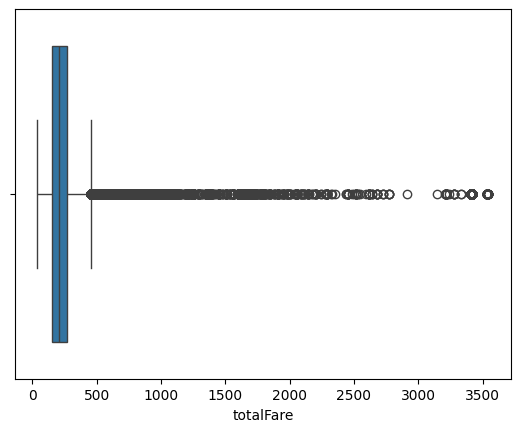

Q1: 148.60
Q3: 272.19
IQR: 123.59
Lower bound: -98.58, Upper bound: 519.37
Amount of outliers: 127,900, Amount of inliers: 3,821,580


In [4]:
# Boxplot
sns.boxplot(jetblue_NY, x='totalFare')
plt.show()

# Calculate bounds
q1, q3 = jetblue_NY['totalFare'].quantile([0.25, 0.75])
IQR = q3 - q1
lower_bound, upper_bound = q1 - 2 * IQR, q3 + 2 * IQR

# Print results
print(f'Q1: {q1:.2f}')
print(f'Q3: {q3:.2f}')
print(f'IQR: {IQR:.2f}')
print(f'Lower bound: {lower_bound:.2f}, Upper bound: {upper_bound:.2f}')

# Identify and count outliers
outliers = jetblue_NY[(jetblue_NY['totalFare'] < lower_bound) | (jetblue_NY['totalFare'] > upper_bound)]
inliers=len(jetblue_NY) - outliers.shape[0]
print(f'Amount of outliers: {outliers.shape[0]:,}, Amount of inliers: {inliers:,}')

count    3,949,480.00
mean           233.95
std            158.31
min             38.61
25%            148.60
50%            208.61
75%            272.19
max          3,544.35
Name: totalFare, dtype: object

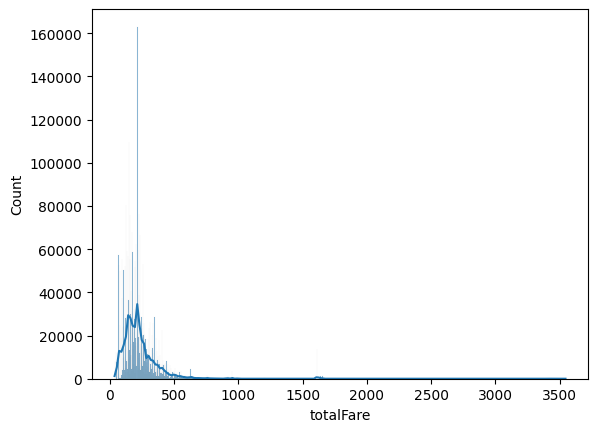

In [5]:
sns.histplot(jetblue_NY['totalFare'],kde=True)
jetblue_NY['totalFare'].describe().apply(lambda x: f'{x:,.2f}')

In [6]:
count_tickets_above1000=jetblue_NY[jetblue_NY['totalFare']>=1000].shape[0]
count_tickets_above1000
#There are 20,501 tickets are equal or more expensive than $1000

20501

In [7]:
jetblue_NY_non_outliers=jetblue_NY[(jetblue_NY['totalFare']>=lower_bound)&(jetblue_NY['totalFare']<=upper_bound)]
jetblue_NY_non_outliers.shape

(3821580, 27)


Our target variable has a right skewness.

Most of our price values in a range of under $1000.We can predict that these values contains alot of Economy class ,little of Businesss class.

In [8]:
count_tickets_above1000=jetblue_NY[jetblue_NY['totalFare']>=1500].shape[0]
count_tickets_above1000
#There are 20,501 tickets are equal or more expensive than $1000
#

19518

In [9]:
jetblue_NY_non_outliers=jetblue_NY[(jetblue_NY['totalFare']<=1500)]
jetblue_NY_non_outliers.shape

(3929962, 27)

In [10]:
# Get the current working directory
cwd = os.getcwd()
jetblue_NY_non_outliers=jetblue_NY_non_outliers.to_csv('jetblue_NY_3', index=False)

file_path = os.path.join(cwd,'jetblue_NY_3')
print("File saved at:", file_path)
#moved file to data folder

File saved at: c:\Users\User\OneDrive\Desktop\Fordham\Programming with Python (CISC-5380-L01)\intro_to_python_project\src\jetblue_NY_3


## Plotting

In [11]:
jetblue_NY_3=pd.read_csv(r'C:\Users\User\OneDrive\Desktop\Fordham\Programming with Python (CISC-5380-L01)\intro_to_python_project\data\Jetblue_NY_3')
jetblue_NY_3.shape

(3929962, 27)

In [35]:
jetblue_NY_3.columns = jetblue_NY_3.columns.str.strip()

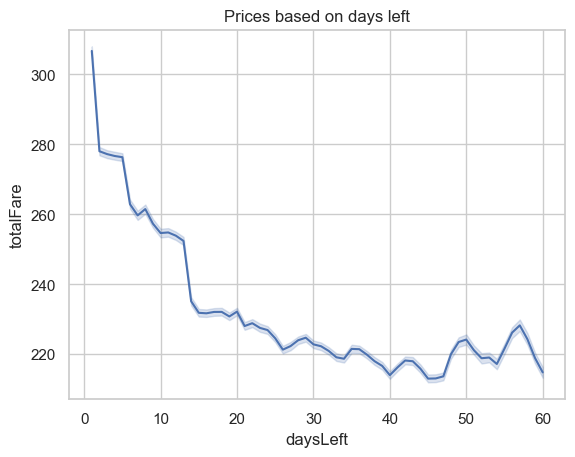

In [36]:
#price vs daysleft
sns.lineplot(jetblue_NY,x='daysLeft', y='totalFare').set(title='Prices based on days left')
sns.set_theme(style='whitegrid')


The graph highlights how the prices rise slowly 45 days before the flight and then drastically start rising 15 days before the flight. this indicates that airlines are starting to raise prices as the flight fills up and fewer seats remain.

Between approximately earlier than 45 days to 60 days, the price is highly fluctuate, but still under $240

The overall trend suggests that the best time to purchase tickets is well in advance (between 20-45 days, avoiding the fluctuation between earlier than 45 days and 60 days), as prices tend to be lower during this period.

**How the Ticket Price change based on the Departure Time and Arrival Time**

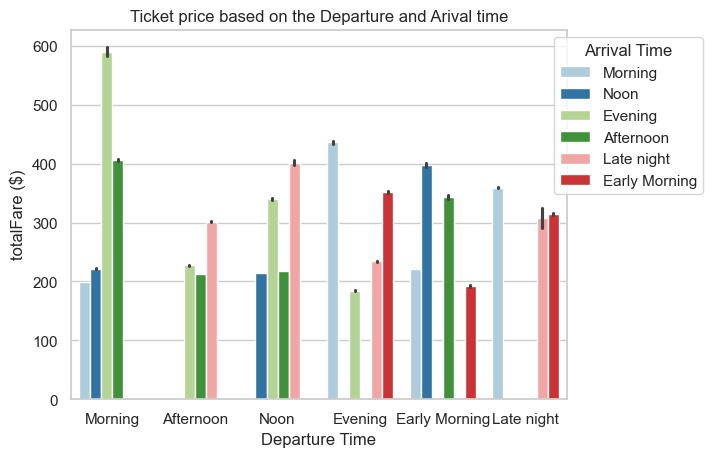

In [37]:
sns.barplot(jetblue_NY,x='departureCategory', y='totalFare', hue='arrivalCategory', palette='Paired').set(title='Ticket price based on the Departure and Arival time', xlabel='Departure Time',ylabel = 'totalFare ($)')
plt.legend(title='Arrival Time', bbox_to_anchor=(1.29, 1), loc='upper right')
sns.set_style('whitegrid')

## Chi-squared test to check Colinearity of features with target

In [38]:
numerical_cols = jetblue_NY_3.select_dtypes(include=['float64', 'int64']).columns
all_categorical_cols=jetblue_NY_3.select_dtypes(include='object').columns

print(numerical_cols)
print(all_categorical_cols)

Index(['elapsedDays', 'baseFare', 'totalFare', 'seatsRemaining',
       'totalTravelDistance', 'daysLeft', 'numStops'],
      dtype='object')
Index(['searchDate', 'route', 'flightDate', 'startingAirport',
       'destinationAirport', 'travelDuration', 'segmentsDepartureTimeRaw',
       'segmentsArrivalTimeRaw', 'segmentsArrivalAirportCode',
       'segmentsDepartureAirportCode', 'segmentsAirlineName',
       'segmentsDurationInSeconds', 'segmentsCabinCode', 'departureTime',
       'arrivalTime', 'departureCategory', 'arrivalCategory'],
      dtype='object')


In [23]:
categorical_cols=['searchDate', 'route', 'flightDate', 'startingAirport',
       'destinationAirport', 'travelDuration','segmentsAirlineName',
       'segmentsDurationInSeconds', 'segmentsCabinCode', 'departureCategory', 'arrivalCategory']

In [27]:
from scipy.stats import chi2_contingency
results=[]
for col in categorical_cols:    
    contigency_table =pd.crosstab(jetblue_NY_3[col],jetblue_NY_3['totalFare'])
    chi2, p_value,_,_ =chi2_contingency(contigency_table)
    print(col)
    print(f'chi-square-stats:{chi2:,.2f}')
    print(f'P-value: {p_value:,.2f}')


searchDate
chi-square-stats:11,525,549.05
P-value: 0.00
route
chi-square-stats:44,731,831.84
P-value: 0.00
flightDate
chi-square-stats:20,453,470.42
P-value: 0.00
startingAirport
chi-square-stats:13,543,861.53
P-value: 0.00
destinationAirport
chi-square-stats:9,912,291.47
P-value: 0.00
travelDuration
chi-square-stats:263,520,809.65
P-value: 0.00
segmentsAirlineName
chi-square-stats:31,646,488.32
P-value: 0.00
segmentsDurationInSeconds
chi-square-stats:1,234,781,169.53
P-value: 0.00
segmentsCabinCode
chi-square-stats:13,407,104.78
P-value: 0.00
departureCategory
chi-square-stats:1,614,568.73
P-value: 0.00
arrivalCategory
chi-square-stats:1,683,553.18
P-value: 0.00


In [40]:
import itertools


# Create empty matrices for chi-square stats and p-values
chi2_matrix=pd.DataFrame(index=categorical_cols, columns=categorical_cols)
p_value_matrix=pd.DataFrame(index=categorical_cols, columns=categorical_cols)

# Iterate over pairs of columns
column_pairs=itertools.combinations(categorical_cols, 2)
for col1, col2, in column_pairs:
    contigency_table=pd.crosstab(jetblue_NY_3[col1], jetblue_NY_3[col2])
    chi2, p_value,_,_=chi2_contingency(contigency_table)

    # Store the results in the matrix. 
    chi2_matrix.loc[col2, col1] = chi2
    chi2_matrix.loc[col1, col2] = chi2
    p_value_matrix.loc[col2, col1] = p_value
    p_value_matrix.loc[col1, col2] = p_value

# Format the chi-square matrix to 2 decimal places
chi2_matrix = chi2_matrix.applymap(lambda x: f'{x:,.2f}')
p_value_matrix=p_value_matrix.applymap(lambda x: f'{x:,.2f}')

print('\nChi-square similarity matrix:')
display(chi2_matrix)

print('\np-value similarity matrix:')
display(p_value_matrix)


Chi-square similarity matrix:


C:\Users\User\AppData\Local\Temp\ipykernel_18716\2361063755.py:21: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  chi2_matrix = chi2_matrix.applymap(lambda x: f'{x:,.2f}')
C:\Users\User\AppData\Local\Temp\ipykernel_18716\2361063755.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  p_value_matrix=p_value_matrix.applymap(lambda x: f'{x:,.2f}')


,searchDate,route,flightDate,startingAirport,destinationAirport,travelDuration,segmentsAirlineName,segmentsDurationInSeconds,segmentsCabinCode,departureCategory,arrivalCategory
searchDate,nan,"64,219.17","14,109,312.86","19,654.15","18,024.73","1,576,968.12","19,228.88","3,792,672.81","10,513.17","4,804.63","5,624.49"
route,"64,219.17",nan,"237,260.42","51,089,506.00","51,089,506.00","89,374,923.56","2,337,661.18","155,503,067.42","2,175,606.46","2,209,847.50","2,023,676.62"
flightDate,"14,109,312.86","237,260.42",nan,"82,765.75","74,152.61","5,020,804.25","90,971.08","16,451,843.48","66,581.77","27,596.58","29,408.78"
startingAirport,"19,654.15","51,089,506.00","82,765.75",nan,"4,745,306.61","22,943,769.04","881,559.59","35,157,488.37","838,578.05","1,555,929.46","1,455,428.22"
destinationAirport,"18,024.73","51,089,506.00","74,152.61","4,745,306.61",nan,"24,512,488.36","769,515.58","36,951,824.36","722,655.48","385,059.07","320,895.63"
travelDuration,"1,576,968.12","89,374,923.56","5,020,804.25","22,943,769.04","24,512,488.36",nan,"7,005,636.97","2,618,732,336.73","4,420,809.17","5,441,649.24","4,988,422.94"
segmentsAirlineName,"19,228.88","2,337,661.18","90,971.08","881,559.59","769,515.58","7,005,636.97",nan,"33,648,004.51","11,789,886.00","196,883.83","303,400.37"
segmentsDurationInSeconds,"3,792,672.81","155,503,067.42","16,451,843.48","35,157,488.37","36,951,824.36","2,618,732,336.73","33,648,004.51",nan,"11,798,230.26","9,558,198.19","9,129,216.39"
segmentsCabinCode,"10,513.17","2,175,606.46","66,581.77","838,578.05","722,655.48","4,420,809.17","11,789,886.00","11,798,230.26",nan,"185,072.56","292,347.28"
departureCategory,"4,804.63","2,209,847.50","27,596.58","1,555,929.46","385,059.07","5,441,649.24","196,883.83","9,558,198.19","185,072.56",nan,"5,659,878.16"



p-value similarity matrix:


,searchDate,route,flightDate,startingAirport,destinationAirport,travelDuration,segmentsAirlineName,segmentsDurationInSeconds,segmentsCabinCode,departureCategory,arrivalCategory
searchDate,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
route,0.00,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
flightDate,0.00,0.00,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
startingAirport,0.00,0.00,0.00,nan,0.00,0.00,0.00,0.00,0.00,0.00,0.00
destinationAirport,0.00,0.00,0.00,0.00,nan,0.00,0.00,0.00,0.00,0.00,0.00
travelDuration,0.00,0.00,0.00,0.00,0.00,nan,0.00,0.00,0.00,0.00,0.00
segmentsAirlineName,0.00,0.00,0.00,0.00,0.00,0.00,nan,0.00,0.00,0.00,0.00
segmentsDurationInSeconds,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,0.00,0.00,0.00
segmentsCabinCode,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,0.00,0.00
departureCategory,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,0.00


Large `chi-square-stats` suggest a stronger association between the feature and the target.

`low p-values`: This implies that the categorical feature is not independent of the target column and has a statistically significant association.

## Outcome => we will have to encode all of them